## REVIEW 3 EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('terrorism.csv',encoding="ISO-8859-1", low_memory=False)
df.head(3) 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df['Casualities'] = df.Killed + df.Wounded

## DATA VISUALIZATION

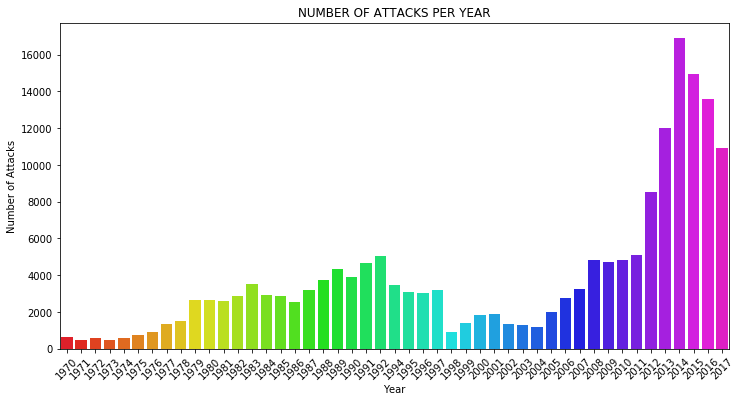

In [5]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (12,6))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'gist_rainbow')
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('NUMBER OF ATTACKS PER YEAR')
plt.show()

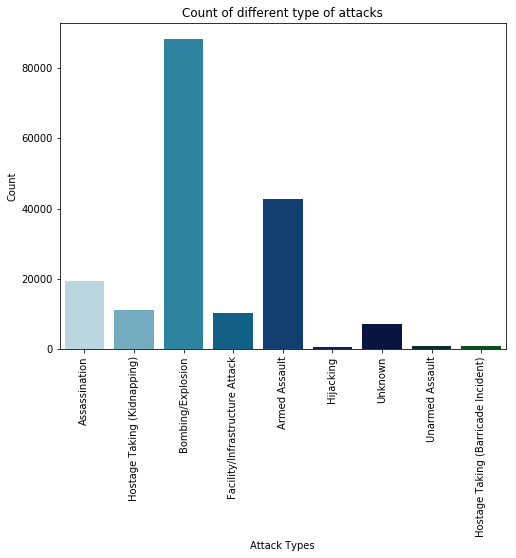

In [6]:
# Number of terrorist activities per year
plt.subplots(figsize=(8,6))
sns.countplot('AttackType',data=df,palette='ocean_r')
plt.xticks(rotation = 90)
plt.xlabel('Attack Types')
plt.ylabel('Count')
plt.title('Count of different type of attacks')
plt.show()

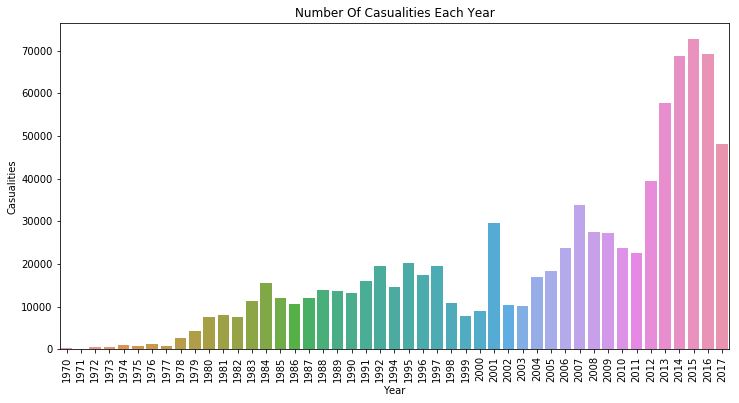

In [7]:
plt.subplots(figsize=(12,6))
yearlyCas = df.groupby('Year').Casualities.sum().to_frame().reset_index()
yearlyCas.columns = ['Year','Casualities']
sns.barplot(x=yearlyCas.Year, y=yearlyCas.Casualities)
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')
plt.show()

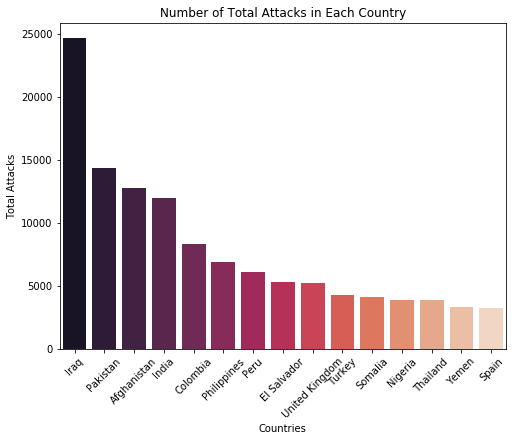

In [8]:
plt.subplots(figsize=(8,6))
country_attacks = df.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'rocket')
plt.xticks(rotation=45)
plt.xlabel('Countries')
plt.title('Number of Total Attacks in Each Country')
plt.show()

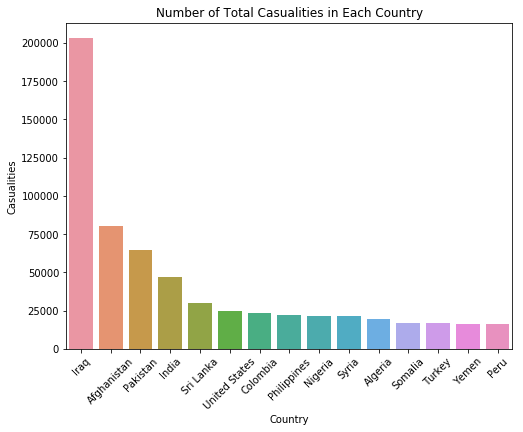

In [9]:
plt.subplots(figsize=(8,6))
numCas = df.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
sns.barplot(x=numCas.Country, y=numCas.Casualities)
plt.xticks(rotation=45)
plt.title('Number of Total Casualities in Each Country')
plt.show()

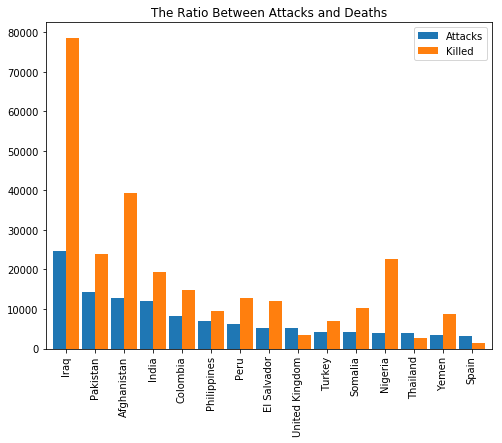

In [10]:
cKRatio=df['Country'].value_counts()[:15].to_frame()
cKRatio.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
cKRatio.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
plt.title("The Ratio Between Attacks and Deaths")
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

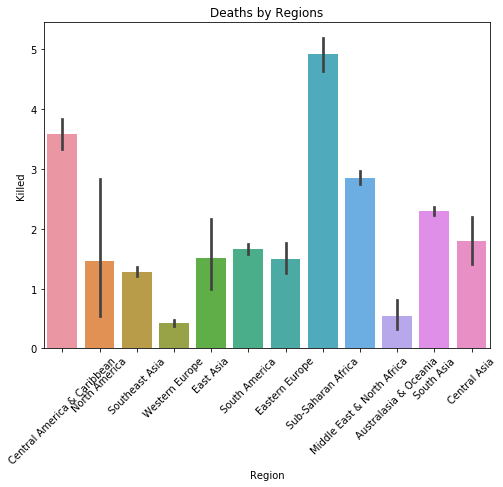

In [11]:
# Here the black lines on the bar are the error bar. Error bars are graphical representations of the variability of data and used on graphs to indicate the error or uncertainty in a reported measurement.

plt.figure(figsize=(8,6))
sns.barplot(x = 'Region', y = 'Killed', data = df)
plt.xticks(rotation = 45)
plt.title('Deaths by Regions')
plt.show()

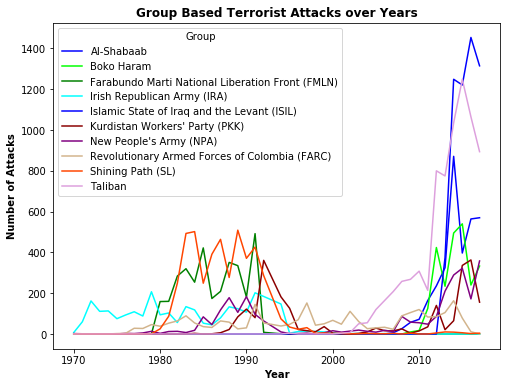

In [12]:
top10Grps = df[df['Group'].isin(df.groupby('Group')['Year'].count().nlargest(11).index)]
top10Grps = top10Grps[~(top10Grps['Group']=='Unknown')]
groupDf = pd.crosstab(top10Grps.Year, top10Grps.Group)
groupDf.head()
cList = ['blue', 'lime', 'green', 'Aqua', 'blue', 'darkred', 'purple', 'tan', 'orangered', 'plum', 'salmon', 'wheat']
groupDf.plot(figsize=(8, 6), color=cList)
plt.xlabel('Year', weight='bold')
plt.ylabel('Number of Attacks', weight='bold')
plt.title('Group Based Terrorist Attacks over Years', weight='bold')
plt.show()

In [13]:
df_temp = pd.DataFrame(top10Grps[top10Grps['success']==1].groupby(top10Grps['Group']).size(), columns=['Successful'])
df_temp['Not_Successful'] = top10Grps[top10Grps['success']==0].groupby(top10Grps['Group']).size()
df_temp.reset_index(inplace=True)
df_temp['Total_Attacks'] = df_temp['Successful'] + df_temp['Not_Successful']

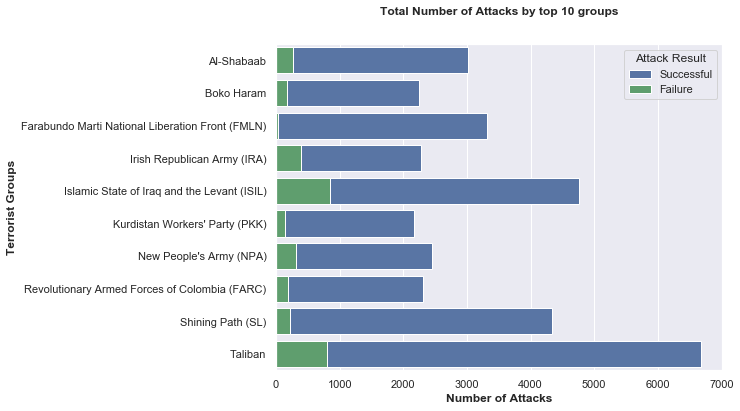

In [14]:
sns.set(style='darkgrid')
plt.figure(figsize=(8, 6))
sns.barplot(y='Group', x='Successful', data=df_temp, color='b', label='Successful')
sns.barplot(y='Group', x='Not_Successful', data=df_temp, color='g', label='Failure')
plt.ylabel('Terrorist Groups', weight='bold')
plt.xlabel('Number of Attacks', weight='bold')
plt.legend(title='Attack Result')
plt.title('Total Number of Attacks by top 10 groups\n\n',weight='bold')
plt.show()

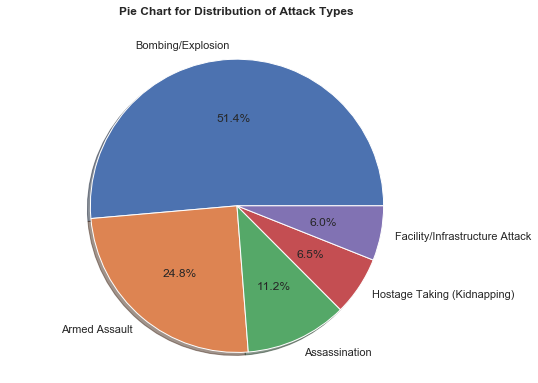

In [15]:
ser_temp = df['AttackType'].value_counts()
ser_temp['Other'] = ser_temp[ser_temp[:] <= 10000].sum()
ser_temp.drop(ser_temp[ser_temp[:] <= 10000].index, inplace=True)
plt.figure(figsize=(8,6))
plt.pie(ser_temp.tolist(), labels=ser_temp.index.tolist(), autopct='%1.1f%%',shadow=True, startangle=0)
plt.title('Pie Chart for Distribution of Attack Types\n\n', weight='bold')
plt.axis('equal')
plt.show()

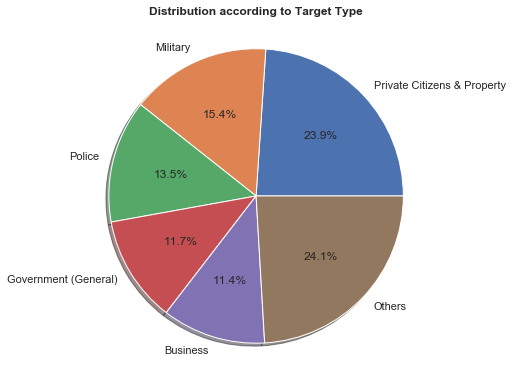

In [16]:
ser_temp = df['Target_type'].value_counts()
ser_temp['Others'] = ser_temp[ser_temp[:] <= 20000].sum()
ser_temp.drop(ser_temp[ser_temp[:] <= 20000].index, inplace=True)
plt.figure(figsize=(8,6))
plt.pie(ser_temp.tolist(), labels=ser_temp.index.tolist(), autopct='%1.1f%%',shadow=True, startangle=0)
plt.title('Distribution according to Target Type\n', weight='bold')
plt.axis('equal')
plt.show()

In [17]:
#First 2000  attacks plotted here
import plotly.express as px
geog = df.head(2000)
geog.fillna(0,axis=0,inplace=True)
geog = geog[['latitude','longitude','Country','Killed']]
fig = px.scatter_geo(geog, 
lat='latitude', 
lon='longitude',
projection="natural earth",
hover_name="Country",
size = "Killed")

fig.show()



C:\Users\SAHIL\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
